In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import gffutils

PROJECT_PATH = Path("/work/rodrigues_2023/")

In [4]:
snippy_20230503 = PROJECT_PATH / "data/variant_call/20230503/mr_cli_clc_rast_snippy"
snippy_isolates = PROJECT_PATH / "data/variant_call/isolates/mr_cli_clc_rast_snippy"
meta_path = PROJECT_PATH / "data/reference/isolates_curated_metadata.csv"
barcodes_path = PROJECT_PATH / "dump/20230503/dominant-barcodes/dominant_barcodes.csv"
mdk_path = PROJECT_PATH / "data/reference/20230503_MDK_table.csv"

In [5]:
meta = pd.read_csv(meta_path)
meta

,Colony Number,Identification,Sample ID,Mouse ID,Tissue,Media,Treatment
0,1,C3L Co Mac 1,C3L_CO_MAC1_S12,C3L,CO,MAC,Treated
1,2,C4L I Mac1,C4L_I_MAC1_S287,C4L,I,MAC,Treated
2,3,C4L I Mac2,C4L_I_MAC2_S171,C4L,I,MAC,Treated
3,4,C3L Co TSA1,C3L_CO_TSA1_S7,C3L,CO,TSA,Treated
4,5,C3L Co TSA2,C3L_CO_TSA2_S172,C3L,CO,TSA,Treated
...,...,...,...,...,...,...,...
155,156,C1L Co 17-5,17_5_S157,C1L,Co,LB,Untreated
156,157,C1R I 18-1,18_1_S158,C1R,I,LB,Untreated
157,300,C4L_S178,C4L_S178,C4L,I,LB,Untreated
158,301,C4N_S75,C4N_S75,C4N,I,LB,Untreated


In [6]:
meta['Mouse ID'].unique()

array(['C3L', 'C4L', 'C3N', 'C3R', 'C4N', 'C4R', 'C2R', 'C2N', 'C2RL',
       'C1N', 'C1R', 'C1L'], dtype=object)

In [7]:
barcodes = pd.read_csv(barcodes_path)
barcode_names = {val:f'B:{key}' for key,val in dict(enumerate(barcodes['barcode'].unique())).items()}
barcodes['barcode_id'] = barcodes['barcode'].apply(lambda x: barcode_names[x])
barcodes

,Sample ID,barcode,Colony Number,Identification,Mouse ID,Tissue,Media,Mouse+Tissue,barcode_id
0,C3L_I_LB4_S201,AGAGTGACTGT,36,C3L I LB4,C3L,I,LB,C3L_I,B:0
1,C4L_I_TSA5_S218,AGAGTGACTGT,53,C4L I TSA5,C4L,I,TSA,C4L_I,B:0
2,C3L_I_LB1_S206,AATGTTACCGA,41,C3L I LB1,C3L,I,LB,C3L_I,B:1
3,1_1_S237,AGAGTGACTGT,72,C2R Co 1-1,C2R,Co,LB,C2R_Co,B:0
4,11_4_S126,AGAGTGACTGT,125,C1N C 11-4,C1N,C,LB,C1N_C,B:0
...,...,...,...,...,...,...,...,...,...
136,C4R_I_LB2-2_S236,AGAGTGACTGT,71,C4L I LB2,C4L,I,LB,C4L_I,B:0
137,17_2_S154,ACGGTTTCTAA,153,C1L Co 17-2,C1L,Co,LB,C1L_Co,B:2
138,13_2_S134,AGAGTGACTGT,133,C1R Co 13-2,C1R,Co,LB,C1R_Co,B:0
139,16_2_S149,AGAGTGACTGT,148,C1L I 16-2,C1L,I,LB,C1L_I,B:0


In [8]:
mdk = pd.read_csv(mdk_path)
mdk

,Colony Number,MDK95,MDK99,MDK99.99
0,1.0,3.451394,5.428978,11.087545
1,2.0,3.659711,5.545203,10.940264
2,3.0,3.598487,5.647825,11.511703
3,4.0,3.428827,5.216415,10.331337
4,5.0,2.529978,4.102725,8.602907
...,...,...,...,...
153,154.0,2.649405,4.034902,7.999296
154,155.0,3.130119,4.956430,10.182151
155,156.0,3.829016,5.642944,10.833231
156,157.0,3.284493,5.014844,9.965988


In [9]:
def collect_snippy(snippy_path, exp_id=''):
    samples = []
    for dir in Path(snippy_path).iterdir():
        df = pd.read_csv(snippy_path / dir.name / 'snps.csv')
        df.insert(0, 'Sample ID', dir.name)
        df.insert(0, 'Experiment ID', exp_id)
        samples.append(df)
    return samples

In [10]:
one_mut = pd.concat([pd.concat(collect_snippy(snippy_20230503, '20230503')),
                     pd.concat(collect_snippy(snippy_isolates, '20210109'))])
one_mut

,Experiment ID,Sample ID,CHROM,POS,TYPE,REF,ALT,EVIDENCE,FTYPE,STRAND,NT_POS,AA_POS,EFFECT,LOCUS_TAG,GENE,PRODUCT
0,20230503,C4N_I_LB_S182,MR_Cli1_1_(paired)_contig_19,136,complex,GGTG,AGTA,AGTA:81 GGTG:7,CDS,-,1/1,p.25,synonymous_variant 6666666.487694.peg.1115 pro...,SEED:fig|6666666.487694.peg.1115,NaN,IS1 protein InsA
1,20230503,C4N_I_LB_S182,MR_Cli1_1_(paired)_contig_36,14204,snp,G,A,A:154 G:0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20230503,C4N_I_LB_S182,MR_Cli1_1_(paired)_contig_36,30770,mnp,NNNNNNN,TCAGTGC,TCAGTGC:42 NNNNNNN:0,CDS,+,1/1,p.??????67GlnCys,missense_variant 6666666.487694.peg.2908 prote...,SEED:fig|6666666.487694.peg.2908,NaN,hypothetical protein
3,20230503,C4N_I_LB_S182,MR_Cli1_1_(paired)_contig_36,139112,complex,GCGGCGCT,CCGGTGCC,CCGGTGCC:160 GCGGCGCT:16,CDS,-,1/1,p.GlnArg1085ArgHis,missense_variant 6666666.487694.peg.3018 prote...,SEED:fig|6666666.487694.peg.3018,NaN,Protein RhsD
4,20230503,C4N_I_LB_S182,MR_Cli1_1_(paired)_contig_37,3636,snp,T,C,C:127 T:3,CDS,-,1/1,p.Lys30Lys,synonymous_variant 6666666.487694.peg.3039 pro...,SEED:fig|6666666.487694.peg.3039,NaN,Mobile element protein
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,20210109,C4R_S177,MR_Cli1_1_(paired)_contig_37,3702,snp,G,A,A:107 G:6,CDS,-,1/1,p.Ala8Ala,synonymous_variant 6666666.487694.peg.3039 pro...,SEED:fig|6666666.487694.peg.3039,NaN,Mobile element protein
7,20210109,C4R_S177,MR_Cli1_1_(paired)_contig_37,3708,snp,G,C,C:109 G:6,CDS,-,1/1,p.Arg6Arg,synonymous_variant 6666666.487694.peg.3039 pro...,SEED:fig|6666666.487694.peg.3039,NaN,Mobile element protein
8,20210109,C4R_S177,MR_Cli1_1_(paired)_contig_37,3717,snp,C,T,T:102 C:6,CDS,-,1/1,p.Ala3Ala,synonymous_variant 6666666.487694.peg.3039 pro...,SEED:fig|6666666.487694.peg.3039,NaN,Mobile element protein
9,20210109,C4R_S177,MR_Cli1_1_(paired)_contig_37,3722,snp,T,G,G:104 T:4,CDS,-,1/1,p.Thr2Pro,missense_variant 6666666.487694.peg.3039 prote...,SEED:fig|6666666.487694.peg.3039,NaN,Mobile element protein


In [11]:
one = pd.merge(left=one_mut, right=meta, on='Sample ID', how='outer')
one = pd.merge(left=one, right=barcodes[['Sample ID', 'barcode', 'barcode_id']], on='Sample ID', how='outer')
one = pd.merge(left=one, right=mdk, on='Colony Number', how='outer')
one = one[ ~one['REF'].apply(lambda x: type(x)==str and ('N' in x)) ]
one.to_csv(PROJECT_PATH / 'dump/20230503/figures/isolate_mutations_barcodes_mdk_meta.csv', index=False)
one

,Experiment ID,Sample ID,CHROM,POS,TYPE,REF,ALT,EVIDENCE,FTYPE,STRAND,...,Identification,Mouse ID,Tissue,Media,Treatment,barcode,barcode_id,MDK95,MDK99,MDK99.99
0,20230503,C4N_I_LB_S182,MR_Cli1_1_(paired)_contig_19,136.0,complex,GGTG,AGTA,AGTA:81 GGTG:7,CDS,-,...,C4N I,C4N,I,LB,Treated,AGAGTGACTGT,B:0,3.124628,4.893428,9.954592
1,20230503,C4N_I_LB_S182,MR_Cli1_1_(paired)_contig_36,14204.0,snp,G,A,A:154 G:0,NaN,NaN,...,C4N I,C4N,I,LB,Treated,AGAGTGACTGT,B:0,3.124628,4.893428,9.954592
3,20230503,C4N_I_LB_S182,MR_Cli1_1_(paired)_contig_36,139112.0,complex,GCGGCGCT,CCGGTGCC,CCGGTGCC:160 GCGGCGCT:16,CDS,-,...,C4N I,C4N,I,LB,Treated,AGAGTGACTGT,B:0,3.124628,4.893428,9.954592
4,20230503,C4N_I_LB_S182,MR_Cli1_1_(paired)_contig_37,3636.0,snp,T,C,C:127 T:3,CDS,-,...,C4N I,C4N,I,LB,Treated,AGAGTGACTGT,B:0,3.124628,4.893428,9.954592
5,20230503,C4N_I_LB_S182,MR_Cli1_1_(paired)_contig_37,3653.0,snp,G,A,A:124 G:2,CDS,-,...,C4N I,C4N,I,LB,Treated,AGAGTGACTGT,B:0,3.124628,4.893428,9.954592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2309,20210109,C4L_S178,MR_Cli1_1_(paired)_contig_37,3653.0,snp,G,A,A:71 G:4,CDS,-,...,C4L_S178,C4L,I,LB,Untreated,AATGTTACCGA,B:1,NaN,NaN,NaN
2310,20210109,C4L_S178,MR_Cli1_1_(paired)_contig_37,3702.0,snp,G,A,A:98 G:12,CDS,-,...,C4L_S178,C4L,I,LB,Untreated,AATGTTACCGA,B:1,NaN,NaN,NaN
2311,20210109,C4L_S178,MR_Cli1_1_(paired)_contig_37,3708.0,snp,G,C,C:99 G:11,CDS,-,...,C4L_S178,C4L,I,LB,Untreated,AATGTTACCGA,B:1,NaN,NaN,NaN
2312,20210109,C4L_S178,MR_Cli1_1_(paired)_contig_37,3717.0,snp,C,T,T:103 C:12,CDS,-,...,C4L_S178,C4L,I,LB,Untreated,AATGTTACCGA,B:1,NaN,NaN,NaN


In [12]:
background = one[(one['Sample ID']=='ATEC_BC_S159') | (one['Sample ID']=='ATEC_BC_S159')].groupby(['CHROM','POS'])['ALT'].agg(list)
bg_index = one[['CHROM','POS']].apply(lambda r: (r['CHROM'],r['POS']) in background.index, axis=1)
one_filt = one[~bg_index]
one_filt.to_csv(PROJECT_PATH / 'dump/20230503/figures/isolate_mutations_barcodes_mdk_meta_bg_filtered.csv', index=False)
one_filt

,Experiment ID,Sample ID,CHROM,POS,TYPE,REF,ALT,EVIDENCE,FTYPE,STRAND,...,Identification,Mouse ID,Tissue,Media,Treatment,barcode,barcode_id,MDK95,MDK99,MDK99.99
0,20230503,C4N_I_LB_S182,MR_Cli1_1_(paired)_contig_19,136.0,complex,GGTG,AGTA,AGTA:81 GGTG:7,CDS,-,...,C4N I,C4N,I,LB,Treated,AGAGTGACTGT,B:0,3.124628,4.893428,9.954592
1,20230503,C4N_I_LB_S182,MR_Cli1_1_(paired)_contig_36,14204.0,snp,G,A,A:154 G:0,NaN,NaN,...,C4N I,C4N,I,LB,Treated,AGAGTGACTGT,B:0,3.124628,4.893428,9.954592
3,20230503,C4N_I_LB_S182,MR_Cli1_1_(paired)_contig_36,139112.0,complex,GCGGCGCT,CCGGTGCC,CCGGTGCC:160 GCGGCGCT:16,CDS,-,...,C4N I,C4N,I,LB,Treated,AGAGTGACTGT,B:0,3.124628,4.893428,9.954592
13,20230503,C4N_I_LB_S182,MR_Cli1_1_(paired)_contig_63,2637.0,snp,A,T,T:22 A:0,CDS,-,...,C4N I,C4N,I,LB,Treated,AGAGTGACTGT,B:0,3.124628,4.893428,9.954592
15,20230503,C3R_C_LB_S180,MR_Cli1_1_(paired)_contig_36,139112.0,complex,GCGGCGCT,CCGGTGCC,CCGGTGCC:187 GCGGCGCT:16,CDS,-,...,C3R C LB,C3R,C,LB,Treated,AATGTTACCGA,B:1,3.141223,4.754679,9.371346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2294,20210109,C4R_S177,MR_Cli1_1_(paired)_contig_15,4583.0,snp,A,G,G:41 A:1,CDS,-,...,C4R_S177,C4N,I,LB,Untreated,NaN,NaN,NaN,NaN,NaN
2295,20210109,C4R_S177,MR_Cli1_1_(paired)_contig_36,139112.0,complex,GCGGCGCT,CCGGTGCC,CCGGTGCC:99 GCGGCGCT:10,CDS,-,...,C4R_S177,C4N,I,LB,Untreated,NaN,NaN,NaN,NaN,NaN
2304,20210109,C4R_S177,MR_Cli1_1_(paired)_contig_40,9325.0,del,TA,T,T:271 TA:0,CDS,-,...,C4R_S177,C4N,I,LB,Untreated,NaN,NaN,NaN,NaN,NaN
2305,20210109,C4L_S178,MR_Cli1_1_(paired)_contig_15,4583.0,snp,A,G,G:42 A:3,CDS,-,...,C4L_S178,C4L,I,LB,Untreated,AATGTTACCGA,B:1,NaN,NaN,NaN


In [13]:
sig_genes = one_filt.groupby(['PRODUCT']).agg(Treated_Mouse=('Mouse ID', lambda x: len(set([m for m in x if type(m)==str and ('3' in m or '4' in m)]))),
                                            Untreated_Mouse=('Mouse ID', lambda x: len(set([m for m in x if type(m)==str and ('1' in m or '2' in m)]))),
                                            Unique_Barcode=('barcode',lambda x: len(set(x))),
                                            Treated_Mice=('Mouse ID', lambda x: set([m for m in x if type(m)==str and ('3' in m or '4' in m)])),
                                            Untreated_Mice=('Mouse ID', lambda x: set([m for m in x if type(m)==str and ('1' in m or '2' in m)])))
sig_genes['E'] = sig_genes['Treated_Mouse']-sig_genes['Untreated_Mouse']
sig_genes.sort_values(by='E', ascending=False).to_csv(PROJECT_PATH / 'dump/20230503/figures/mutated_genes_vs_unique_mouse.csv')
sig_genes.sort_values(by='E', ascending=False)

,Treated_Mouse,Untreated_Mouse,Unique_Barcode,Treated_Mice,Untreated_Mice,E
PRODUCT,,,,,,
Transcriptional activator of cad operon,3,0,2,"{C3N, C4R, C4L}",{},3
Undecaprenyl-phosphate galactosephosphotransferase (EC 2.7.8.6),3,0,2,"{C3L, C4R, C4N}",{},3
Methyl-accepting chemotaxis protein II (aspartate chemoreceptor protein),1,0,1,{C4R},{},1
"Rhodanese domain protein, Enterobacterial subgroup, YceA homolog",1,0,1,{C4L},{},1
"Galactose/methyl galactoside ABC transporter, substrate-binding protein MglB (EC 3.6.3.17)",1,0,1,{C3L},{},1
Uncharacterized lipoprotein YedD,1,0,1,{C4R},{},1
Uncharacterized protein YdiJ,1,0,1,{C3N},{},1
"DNA-binding transcriptional activator DecR, AsnC family",1,0,1,{C3N},{},1
"Transcriptional activator of maltose regulon, MalT",4,3,4,"{C3N, C3L, C4R, C4L}","{C2RL, C1L, C1N}",1


In [14]:
# selected_for_further_investigation
select = ['C4R_I_LB3_S227', 'C3L_CO_LB2_S190',
        'C4R_I_LB2-1_S225', 'C4L_I_LB5_S231',
        'C3N_CO_LB1_S183', 'C4L_I_TSA5_S218',
        'C3L_I_LB4_S201', 'C3N_C_LB5_S195',
        'C4N_S75', 'C4R_S177']

In [30]:
mut = one[one['Sample ID'].apply(lambda x: x in select)].groupby(['Sample ID', 'PRODUCT'])['POS'].agg(len).reset_index()
mut = mut.pivot(columns='PRODUCT',index='Sample ID')
mut.to_csv('selected_colonies_by_mutation.csv')
mut

POS  \
PRODUCT          IS1 protein InsA   
Sample ID                           
C3L_CO_LB2_S190               NaN   
C3L_I_LB4_S201                NaN   
C3N_CO_LB1_S183               NaN   
C3N_C_LB5_S195                NaN   
C4L_I_LB5_S231                NaN   
C4L_I_TSA5_S218               NaN   
C4N_S75                       1.0   
C4R_I_LB2-1_S225              NaN   
C4R_I_LB3_S227                NaN   
C4R_S177                      NaN   

                                                                                \
PRODUCT          IncF plasmid conjugative transfer pilus assembly protein TraF   
Sample ID                                                                        
C3L_CO_LB2_S190                                                 1.0              
C3L_I_LB4_S201                                                  NaN              
C3N_CO_LB1_S183                                                 1.0              
C3N_C_LB5_S195                                                  1.0              
C4L_I_LB5_S231                                                  1.0              
C4L_I_TSA5_S218                                                 1.0              
C4N_S75                                                         1.0              
C4R_I_LB2-1_S225                                                1.0              
C4R_I_LB3_S227                                                  1.0              
C4R_S177                                                        NaN              

                                                                                \
PRODUCT          Maltose regulon regulatory protein MalI (repressor for malXY)   
Sample ID                                                                        
C3L_CO_LB2_S190                                                 NaN              
C3L_I_LB4_S201                                                  1.0              
C3N_CO_LB1_S183                                                 NaN              
C3N_C_LB5_S195                                                  NaN              
C4L_I_LB5_S231                                                  NaN              
C4L_I_TSA5_S218                                                 NaN              
C4N_S75                                                         NaN              
C4R_I_LB2-1_S225                                                NaN              
C4R_I_LB3_S227                                                  NaN              
C4R_S177                                                        NaN              

                                                                                           \
PRODUCT          Methyl-accepting chemotaxis protein II (aspartate chemoreceptor protein)   
Sample ID                                                                                   
C3L_CO_LB2_S190                                                 NaN                         
C3L_I_LB4_S201                                                  NaN                         
C3N_CO_LB1_S183                                                 NaN                         
C3N_C_LB5_S195                                                  NaN                         
C4L_I_LB5_S231                                                  NaN                         
C4L_I_TSA5_S218                                                 NaN                         
C4N_S75                                                         NaN                         
C4R_I_LB2-1_S225                                                NaN                         
C4R_I_LB3_S227                                                  1.0                         
C4R_S177                                                        NaN                         

                                                      \
PRODUCT          Mobile element protein Protein RhsD   
Sample ID                                              
C3L_CO_LB2_S190                     

In [37]:
[x for x in one['Sample ID'].unique() if type(x)==str and x.startswith('ATEC')]

['ATEC_BC_S159', 'ATECBC_S175']

In [102]:
from dna_features_viewer import BiopythonTranslator
from Bio import SeqIO

class MyCustomTranslator(BiopythonTranslator):
    """Custom translator implementing the following theme:

    - Color terminators in green, CDS in blue, all other features in gold.
    - Do not display features that are restriction sites unless they are BamHI
    - Do not display labels for restriction sites
    - For CDS labels just write "CDS here" instead of the name of the gene.

    """

    def compute_feature_color(self, feature):
        if feature.type == "gene":
            return "blue"
        elif feature.type == "terminator":
            return "green"
        else:
            return "gold"

    def compute_feature_label(self, feature):
        if feature.type == 'restriction_site':
            return None
        elif feature.type == "CDS":
            return "CDS here"
        else:
            return BiopythonTranslator.compute_feature_label(self, feature)

    def compute_filtered_features(self, features):
        """Do not display promoters. Just because."""
        return [
            feature for feature in features
            if (feature.type != "CDS")
        ]

gffp = PROJECT_PATH / "data/genome_assembly/MR_Cli/spades_run_03/01_prokka_annotation/PROKKA_05112023.gbk"
mar = "/project/greencenter/Toprak_lab/shared/marinelle-barcoding-project/data/genome_assembly/MR_Cli/02_rast_annotation_by_marinelle/all_ATEC_annotated_contigs.gb"

with open(mar, "r") as file:
    mar_rec = [record for record in SeqIO.parse(file, "genbank")]

with open(gffp, "r") as file:
    records = [record for record in SeqIO.parse(file, "genbank")]
records[0]

SeqRecord(seq=Seq('GAAGTGTGGACGCCAGTCTGCATGGAGCCGACCTTGAAATACCACCCTTTAATG...ATC'), id='PEc_1', name='PEc_1', description='Escherichia coli strain PEc', dbxrefs=[])

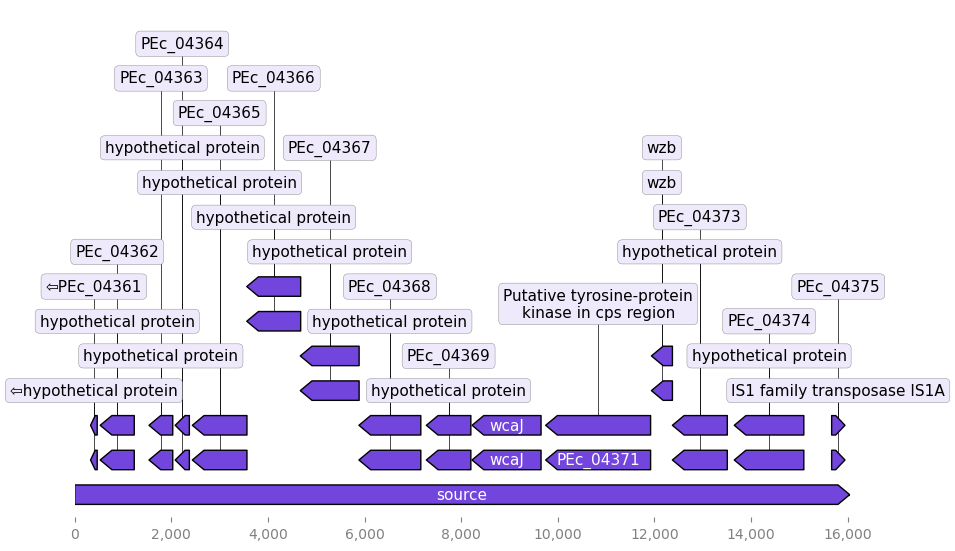

In [101]:
graphic_record = BiopythonTranslator().translate_record(records[35])
ax, _ = graphic_record.plot(figure_width=10, strand_in_label_threshold=7)

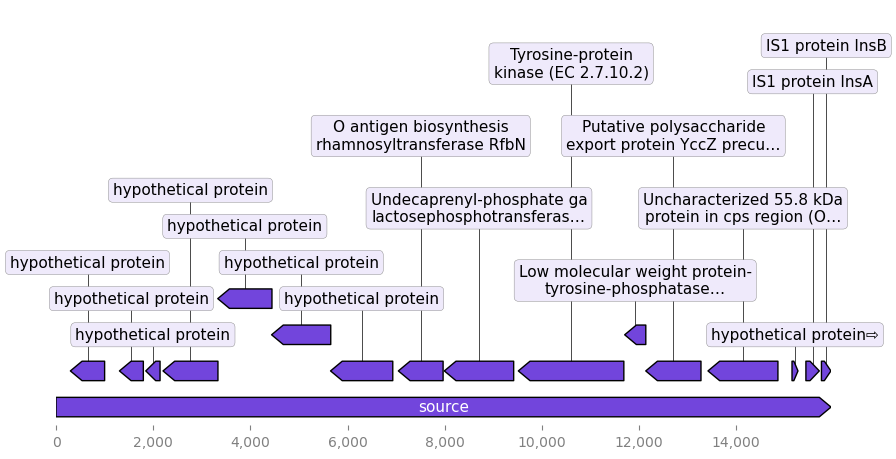

In [103]:
graphic_record = BiopythonTranslator().translate_record(mar_rec[39])
ax, _ = graphic_record.plot(figure_width=10, strand_in_label_threshold=7)

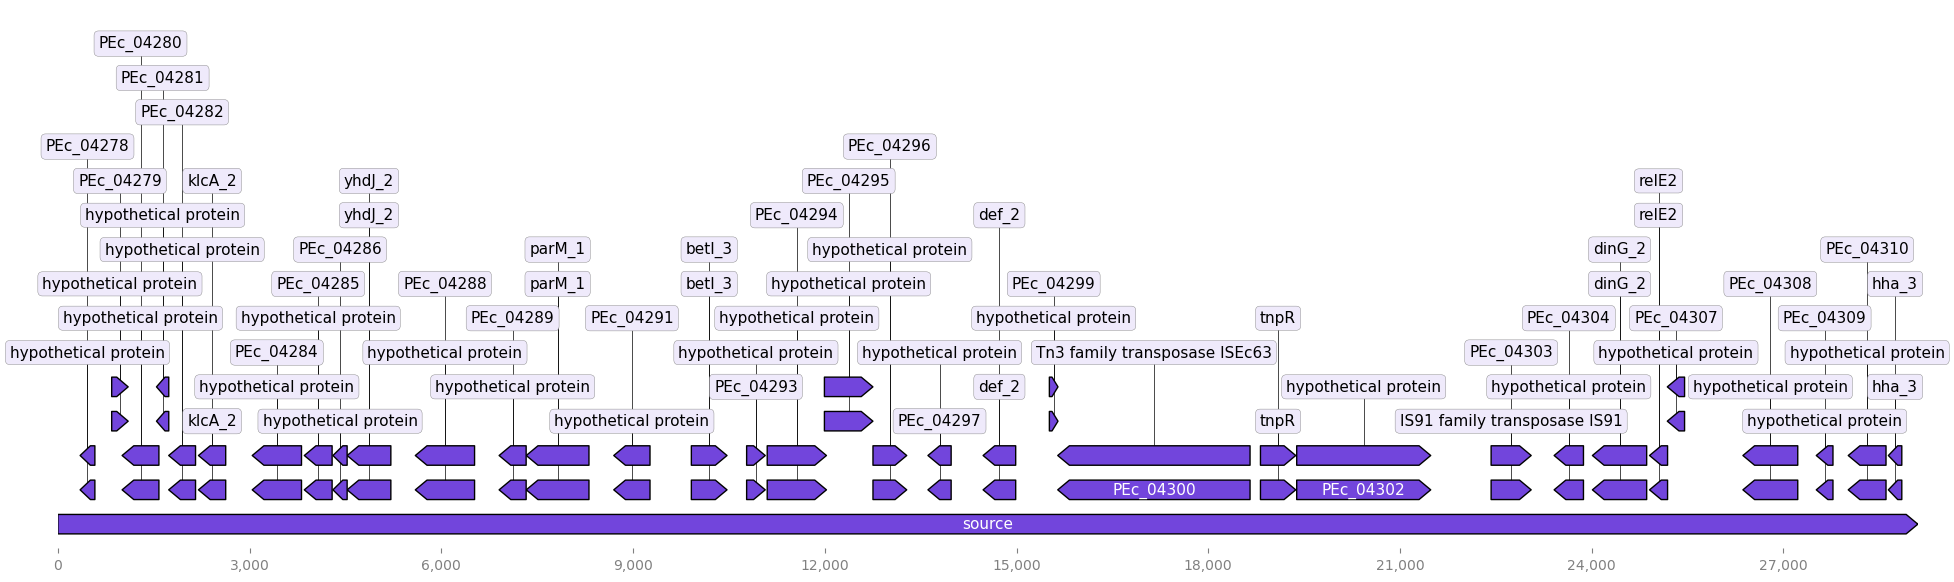

In [119]:
graphic_record = BiopythonTranslator().translate_record(records[32])
ax, _ = graphic_record.plot(figure_width=24, strand_in_label_threshold=7)

In [118]:
allvar[allvar['Original Scaffold Coordinate']=='NODE_1_length_575659_cov_33.563833:785-1083']

,index,Original Scaffold Coordinate,New Scaffold Coordinate,Original Sequence,New Sequence,Contig,Start,Mutation Type,Mutation Length,Overlapping Features,Sample ID
431,0,NODE_1_length_575659_cov_33.563833:785-1083,NODE_1_length_575659_cov_33.563833_pilon:785-1105,CTGTTTTGGCGGATGAGAGAAGATTTTCAGCCTGATACAGATTAAA...,NNNNNNNNNNGAAGAGCTTGGCGGCGAATGGGCTGACCGCTTCCTT...,NODE_1_length_575659_cov_33.563833,785-1083,SNP,1,,C3N_CO_LB7_S198
468,0,NODE_1_length_575659_cov_33.563833:785-1083,NODE_1_length_575659_cov_33.563833_pilon:785-1105,CTGTTTTGGCGGATGAGAGAAGATTTTCAGCCTGATACAGATTAAA...,NNNNNNNNNNGAAGAGCTTGGCGGCGAATGGGCTGACCGCTTCCTT...,NODE_1_length_575659_cov_33.563833,785-1083,SNP,1,,C3L_I_LB5_S202
961,0,NODE_1_length_575659_cov_33.563833:785-1083,NODE_1_length_575659_cov_33.563833_pilon:785-1105,CTGTTTTGGCGGATGAGAGAAGATTTTCAGCCTGATACAGATTAAA...,NNNNNNNNNNGAAGAGCTTGGCGGCGAATGGGCTGACCGCTTCCTT...,NODE_1_length_575659_cov_33.563833,785-1083,SNP,1,,3_5_S251
1046,0,NODE_1_length_575659_cov_33.563833:785-1083,NODE_1_length_575659_cov_33.563833_pilon:785-1105,CTGTTTTGGCGGATGAGAGAAGATTTTCAGCCTGATACAGATTAAA...,NNNNNNNNNNGAAGAGCTTGGCGGCGAATGGGCTGACCGCTTCCTT...,NODE_1_length_575659_cov_33.563833,785-1083,SNP,1,,C3N_I_LB1_S196
1293,0,NODE_1_length_575659_cov_33.563833:785-1083,NODE_1_length_575659_cov_33.563833_pilon:785-1105,CTGTTTTGGCGGATGAGAGAAGATTTTCAGCCTGATACAGATTAAA...,NNNNNNNNNNGAAGAGCTTGGCGGCGAATGGGCTGACCGCTTCCTT...,NODE_1_length_575659_cov_33.563833,785-1083,SNP,1,,C3L_CO_TSA3_S173
1612,0,NODE_1_length_575659_cov_33.563833:785-1083,NODE_1_length_575659_cov_33.563833_pilon:785-1105,CTGTTTTGGCGGATGAGAGAAGATTTTCAGCCTGATACAGATTAAA...,NNNNNNNNNNGAAGAGCTTGGCGGCGAATGGGCTGACCGCTTCCTT...,NODE_1_length_575659_cov_33.563833,785-1083,SNP,1,,C3N_C_TSA1-2_S216
1660,0,NODE_1_length_575659_cov_33.563833:785-1083,NODE_1_length_575659_cov_33.563833_pilon:785-1105,CTGTTTTGGCGGATGAGAGAAGATTTTCAGCCTGATACAGATTAAA...,NNNNNNNNNNGAAGAGCTTGGCGGCGAATGGGCTGACCGCTTCCTT...,NODE_1_length_575659_cov_33.563833,785-1083,SNP,1,,C4L_C_LB2_S224
2118,0,NODE_1_length_575659_cov_33.563833:785-1083,NODE_1_length_575659_cov_33.563833_pilon:785-1105,CTGTTTTGGCGGATGAGAGAAGATTTTCAGCCTGATACAGATTAAA...,NNNNNNNNNNGAAGAGCTTGGCGGCGAATGGGCTGACCGCTTCCTT...,NODE_1_length_575659_cov_33.563833,785-1083,SNP,1,,C4R_I_LB1_S226
2625,0,NODE_1_length_575659_cov_33.563833:785-1083,NODE_1_length_575659_cov_33.563833_pilon:785-1105,CTGTTTTGGCGGATGAGAGAAGATTTTCAGCCTGATACAGATTAAA...,NNNNNNNNNNGAAGAGCTTGGCGGCGAATGGGCTGACCGCTTCCTT...,NODE_1_length_575659_cov_33.563833,785-1083,SNP,1,,10_1_S118
